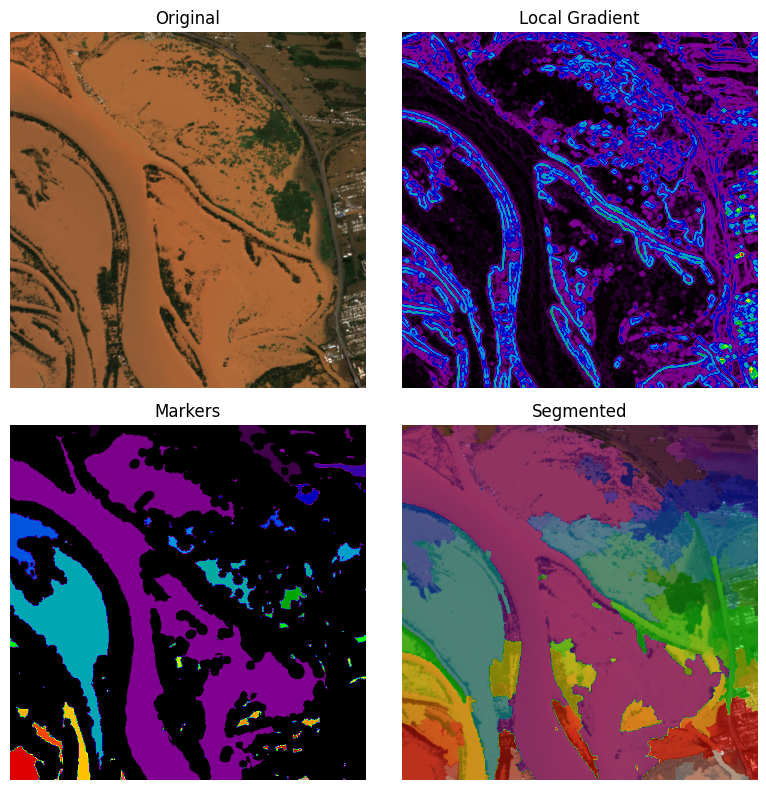

In [10]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage import io
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

image = img_as_ubyte(io.imread('./test_images/sentinel2/file_0_0.png'))

gray_image = rgb2gray(image)
gray_image = img_as_ubyte(gray_image)

# denoise image
denoised = rank.median(gray_image, disk(2))


# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=0.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

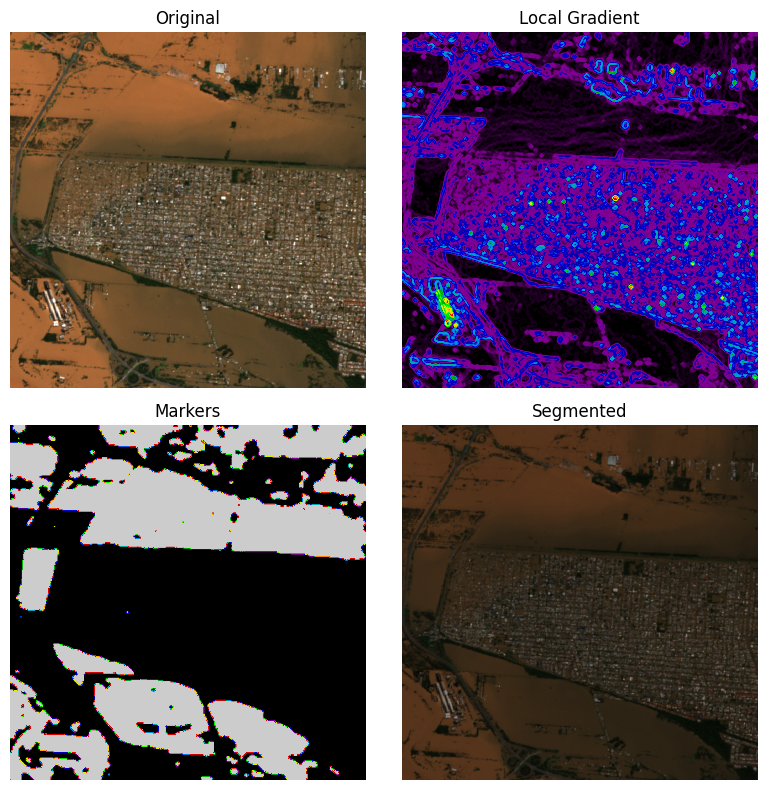

In [11]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

image = img_as_ubyte(io.imread('./test_images/sentinel2/file_0_1.png'))

gray_image = rgb2gray(image)
gray_image = img_as_ubyte(gray_image)

# denoise image
denoised = rank.median(gray_image, disk(2))

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

custom_marker_image = io.imread('./test_images/masks/tile_0_1.png')
markers = (custom_marker_image > 0).astype(int)

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=0.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

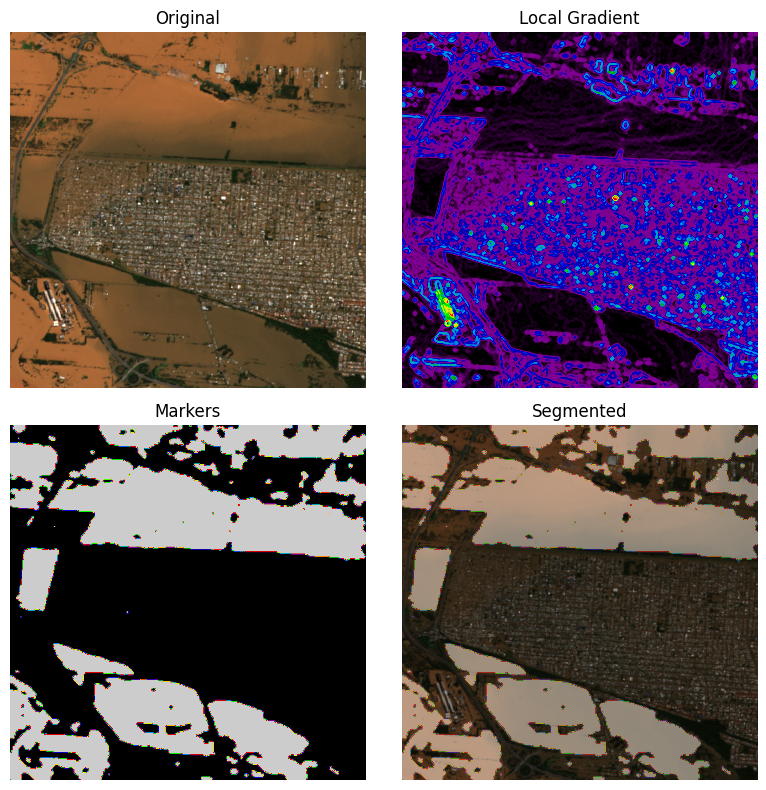

In [16]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

# Load the satellite image
image = img_as_ubyte(io.imread('./test_images/sentinel2/file_0_1.png'))

# Convert the image to grayscale
gray_image = rgb2gray(image)
gray_image = img_as_ubyte(gray_image)

# Denoise the grayscale image
denoised = rank.median(gray_image, disk(2))

# Compute the local gradient (for edge detection)
gradient = rank.gradient(denoised, disk(2))

# Load the custom marker image (0 = non-water, 1 = water)
custom_marker_image = io.imread('./test_images/masks/tile_0_1.png')

# Convert custom marker to int and set water (1) and non-water (0) regions
markers = np.zeros_like(custom_marker_image, dtype=int)
markers[custom_marker_image > 0] = 2  # Water regions
markers[custom_marker_image == 0] = 1  # Non-water regions

# Apply the watershed algorithm using the gradient and custom markers
labels = watershed(gradient, markers)

# Display the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

# Display original image
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

# Display the gradient
ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

# Display the custom markers
ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

# Display the final segmentation overlaid on the original image
ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=0.5)
ax[3].set_title("Segmented")

# Turn off axes for cleaner presentation
for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()